In [1]:
import seaborn as sns
import torch
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
sns.set_style('darkgrid')

## Analysis for attack
- Load model and verify everything is correct or not

In [18]:
dataset = 'cifar10' # [cifar10, svhn, tinyimagenet]
model = 'resnet18' # [resnet18, googlenet, vgg11]
atk = 'DeepFool' # [DeepFool, PGD]
split = 'train'

print(f'Dataset: {dataset} \t Attack: {atk} \t Model: {model}')
# print(f'\n')

data = torch.load(f'../FAS_data/{dataset}/{model}_{atk}.pth', map_location='cpu')
# df = pd.read_csv(f'../csv_data/FAS_data/{dataset}/{model}_{split}_{atk}_0.csv')
# no_img_df = {'ddbs': data['ddbs'], 'FAS_score': data['FAS_score'], 'steps_to_atk': data['steps_to_atk'], 'predictions': data['predictions'] }
df = pd.DataFrame(data)

for k, v in df.items():
    if type(v) == list:
        print(f'{k} \t {len(v)}')
    else:
        print(f'{k}  \t {v.shape}')
# df

Dataset: cifar10 	 Attack: DeepFool 	 Model: resnet18
ddbs  	 (50000,)
gt  	 (50000,)
steps_to_atk  	 (50000,)
predictions  	 (50000,)
Flipping_Freq  	 (50000,)
Model_preds  	 (50000,)
lip  	 (50000,)


Correlation: (0.34713558604011985, 0.0)


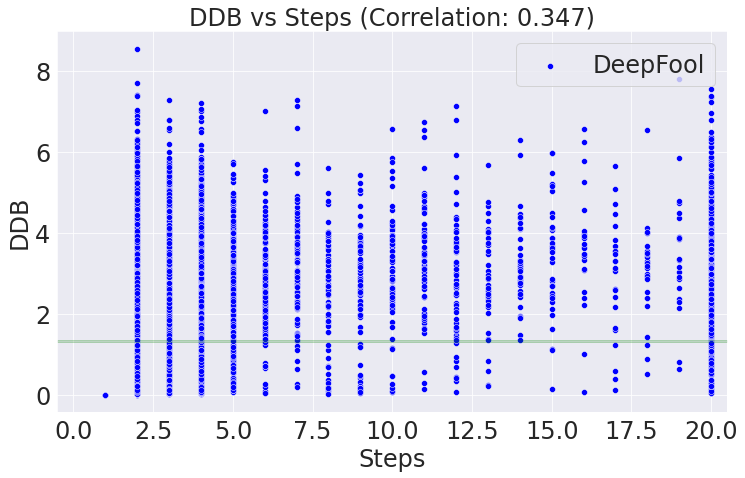

In [19]:
# plt.subplots(figsize=(5, 10))
# h = sns.scatterplot(data=data, y='ddbs', x='steps_to_atk', hue='FAS_score')
# h.xaxis.set_major_locator(ticker.MultipleLocator(1))
SMALL_SIZE = 24
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(12, 7))
corr = scipy.stats.pearsonr(df['ddbs'], df['steps_to_atk'])
print('Correlation:', corr)
x1 = [-0.5, 20.5]

h = sns.scatterplot(data= df, y='ddbs', x='steps_to_atk',label=f'{atk}', color='blue')
plt.legend(loc='upper right')
plt.fill_between(x1, 3, 4, color = 'green', alpha=0.2)
plt.xlim(x1)
# h = sns.regplot(data= df, y='ddbs', x='steps_to_atk')
plt.title(f'DDB vs Steps (Correlation: {corr[0]:.3f})')
plt.ylabel('DDB', fontsize = SMALL_SIZE)
plt.xlabel('Steps', fontsize = SMALL_SIZE)
plt.savefig(f'images/{dataset}_{atk}_{model}.png', bbox_inches='tight')

### Histogram of Steps required to attack a sample
- PS. y axis is in log scale

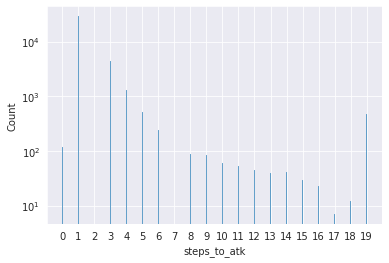

In [9]:
g = sns.histplot(data=data, x="steps_to_atk")
g.set_yscale("log")
g.xaxis.set_major_locator(ticker.MultipleLocator(1))

 13    4447
 12    4339
 14    4236
 11    4005
 15    3494
 10    3444
 16    2754
 9     2731
 8     2326
 17    2181
 7     1904
 18    1620
 6     1593
 5     1303
 19    1237
-1     1223
 1     1112
 4      952
 0      867
 20     842
 2      792
 21     608
 3      553
 22     418
 23     277
 24     206
 25     135
 26     102
 27      82
 31      66
 28      56
 30      53
 29      42
Name: Flipping_Freq, dtype: int64

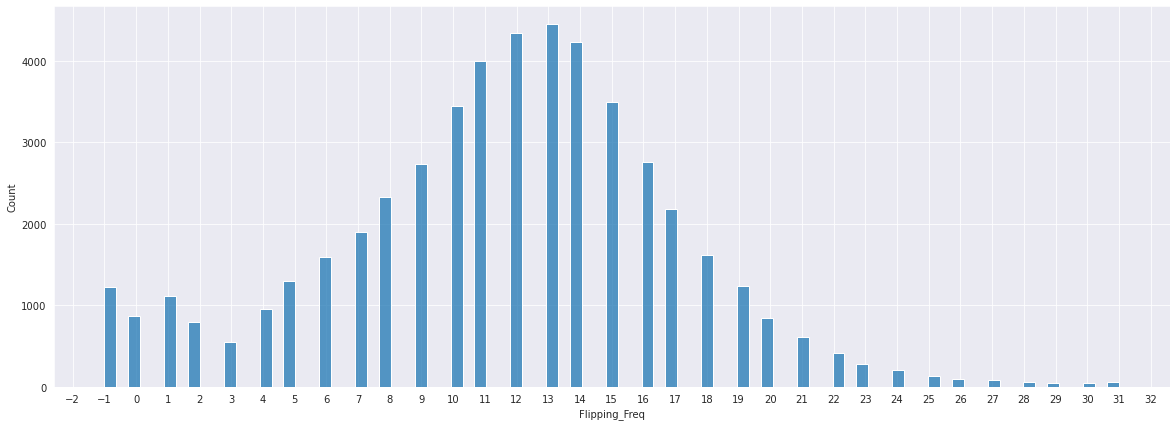

In [12]:
plt.figure(figsize=(20,7))
g = sns.histplot(data=df, x="Flipping_Freq")
# g.set_yscale("log")
g.xaxis.set_major_locator(ticker.MultipleLocator(1))
df['Flipping_Freq'].value_counts()
# df[''].value_counts()

### Correlation between ddbs and steps required to attack

In [37]:
# plt.subplots(figsize=(5, 10))
# h = sns.scatterplot(data=data, y='ddbs', x='steps_to_atk', hue='FAS_score')
# h.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.figure(figsize=(15, 7))
corr = scipy.stats.pearsonr(df['ddbs'], df['steps_to_atk'])
print('Correlation:', corr)
x1 = [-0.5, 20.5]

h = sns.scatterplot(data= df, y='ddbs', x='steps_to_atk',label=f'{dataset}+{atk}+{model}\n Correlation: {corr[0]:.3f}', color='red',)
plt.fill_between(x1, [1.3, 1.3], [1.325, 1.325], color = 'green', alpha=0.2)
plt.xlim([-0.5,20.5])
# h = sns.regplot(data= df, y='ddbs', x='steps_to_atk')
plt.title('Distance to Decision Boundary (DDBS) vs Steps required to attack (Steps)')
plt.ylabel('DDBS')
plt.xlabel('Steps')
plt.savefig(f'images/{dataset}_{atk}_{model}.pdf', bbox_inches='tight')
plt.close()

Correlation: (0.35054051417184334, 0.0)


## Analysis of DDB vs FAS

Correlation: (-0.087278485519243, 3.897696638188667e-85)


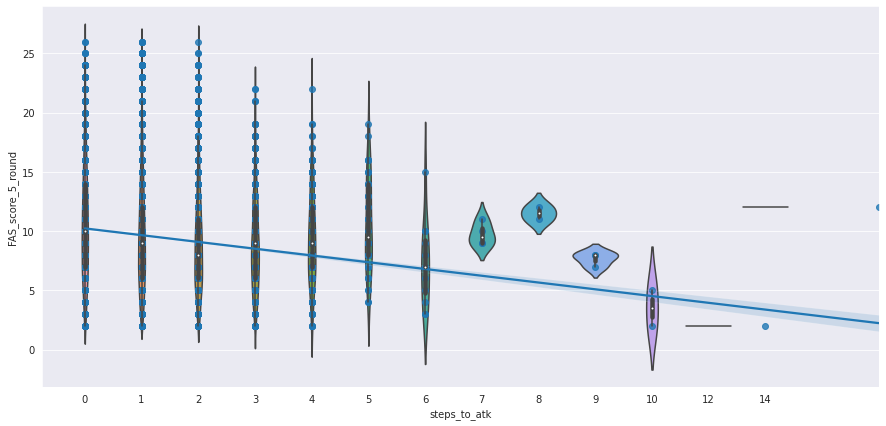

In [17]:
# plt.figure(figsize=(7,5))
plt.figure(figsize=(15, 7))
ax1 = sns.violinplot(data=df, y ='FAS_score_5_round', x='steps_to_atk')
ax1 = sns.regplot(data=df, y ='FAS_score_5_round', x='steps_to_atk')
print('Correlation:', scipy.stats.pearsonr(df['FAS_score_5_round'], df['steps_to_atk']))
# ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))

DDB median: 1.5266627669334412
FAS median: 9.0


<AxesSubplot:xlabel='FAS_score_5_round', ylabel='ddbs'>

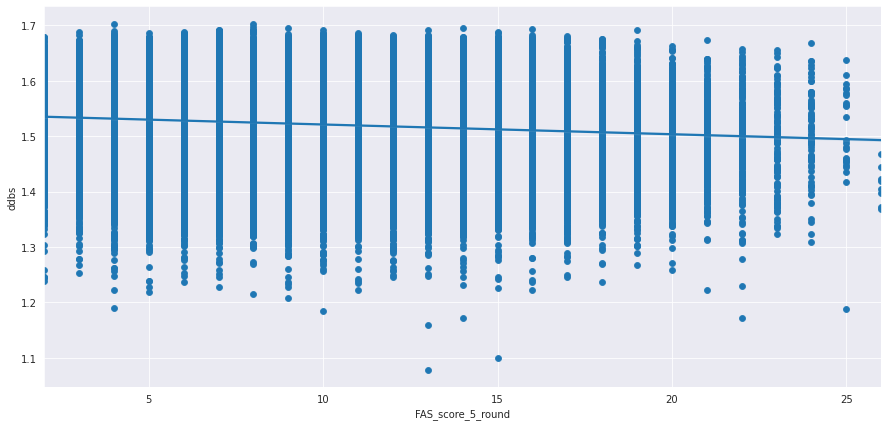

In [23]:
plt.figure(figsize=(15,7))
median_ddbs = np.median(df.ddbs)
median_fas = np.median(df.FAS_score_5_round)
print(f'DDB median: {median_ddbs}')
print(f'FAS median: {median_fas}')
sns.scatterplot(data=df, x ='FAS_score_5_round', y='ddbs')
sns.regplot(data=df, x ='FAS_score_5_round', y='ddbs')

Correlation: (-0.4566775034384539, 0.0)


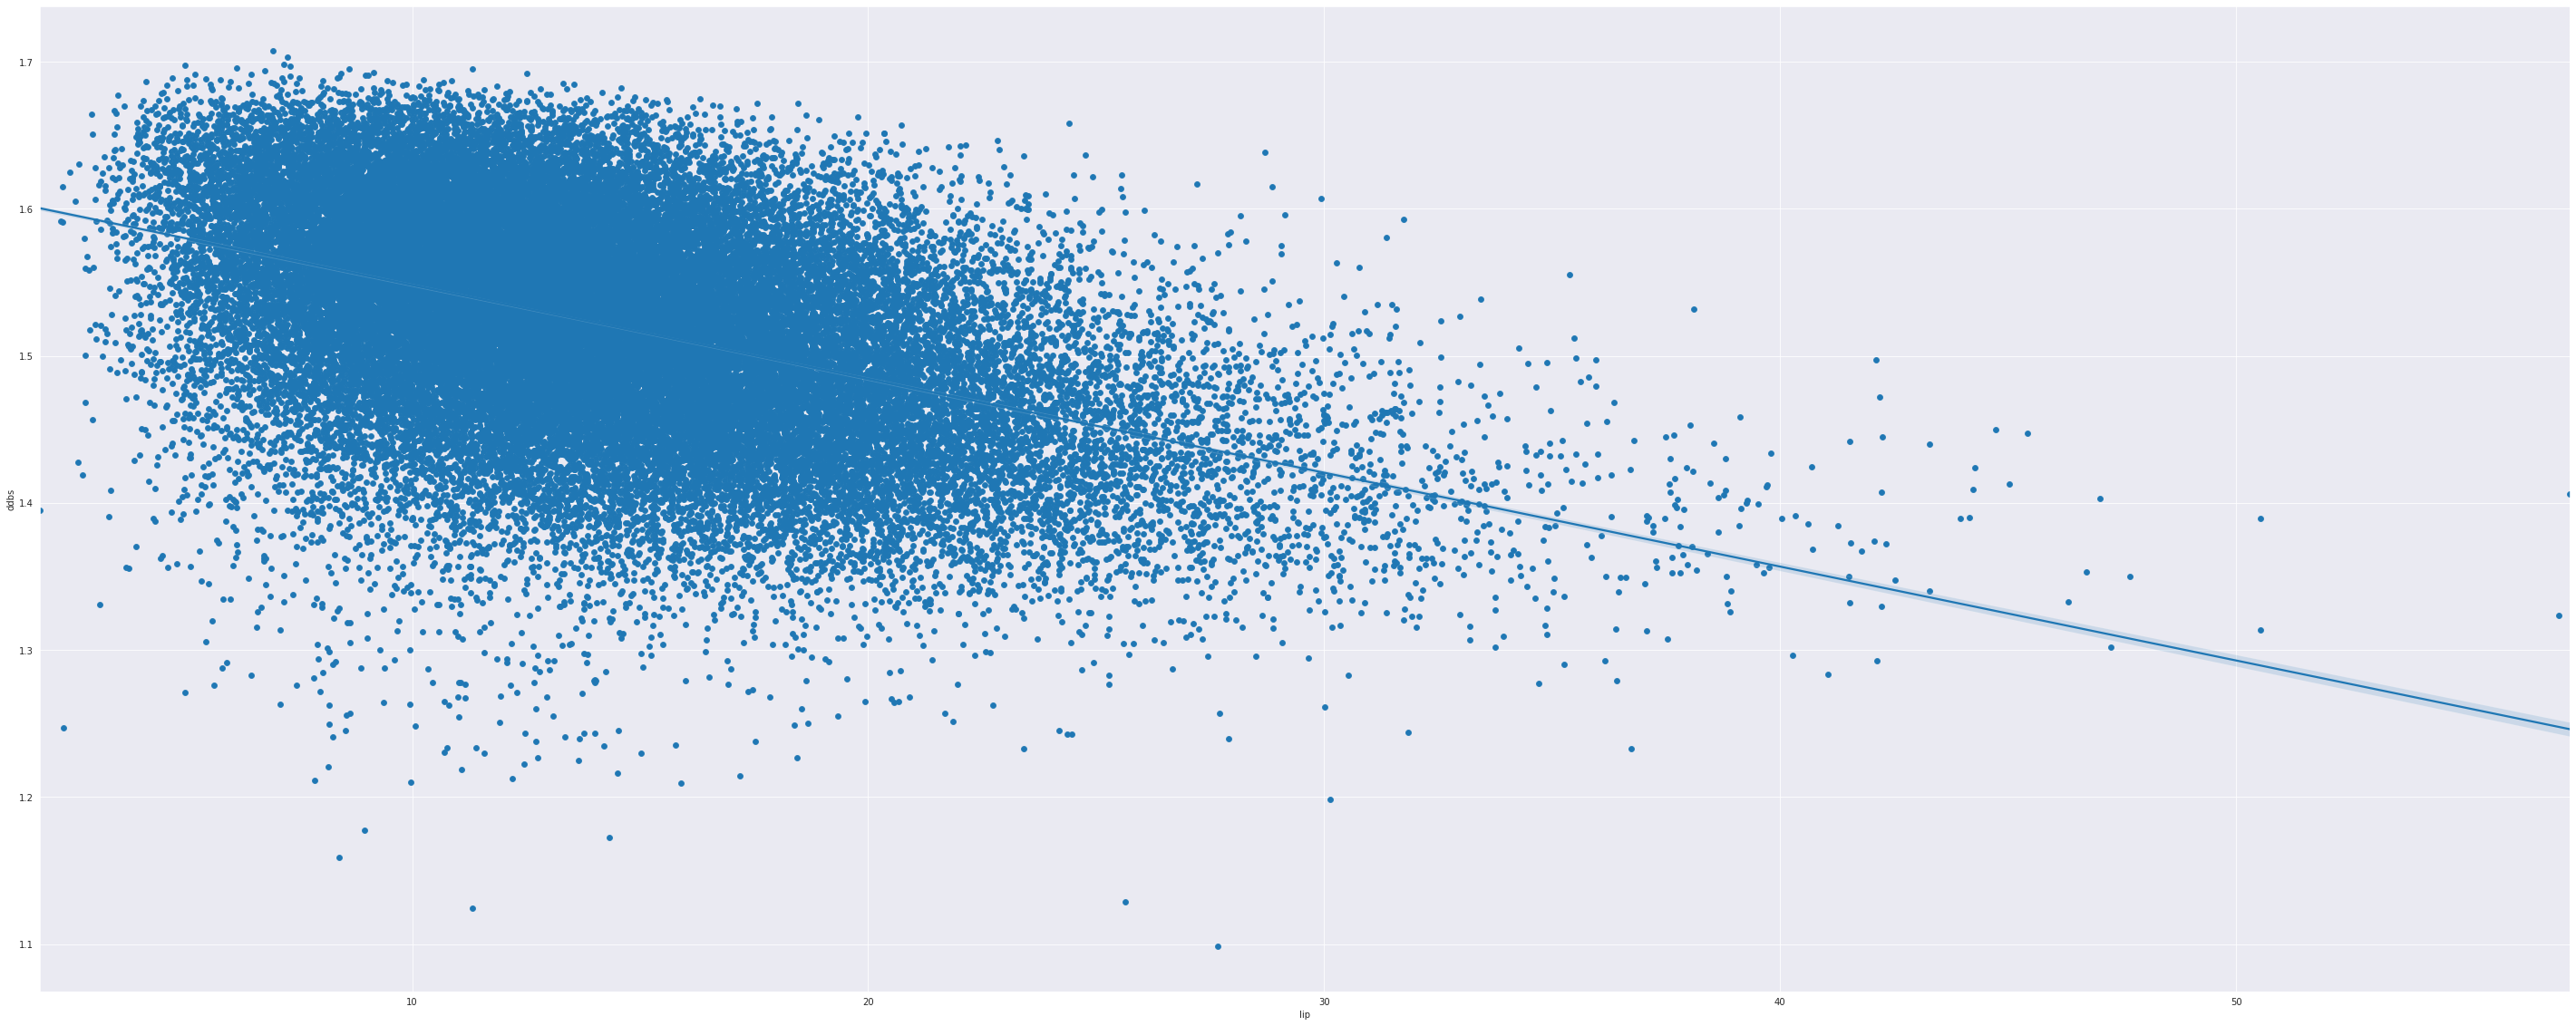

In [7]:
plt.figure(figsize=(50, 20))

sns.scatterplot(data=df, y ='ddbs', x='lip')
sns.regplot(data=df, y ='ddbs', x='lip')
print('Correlation:', scipy.stats.pearsonr(df['ddbs'], df['lip']))

## Quadrant Analysis

In [10]:
quads = {}
quads['HF + FDB'] = df[(df['FAS_score'] > median_fas) & (df['ddbs'] > median_ddbs)]
quads['LF + FDB'] = df[(df['FAS_score'] < median_fas) & (df['ddbs'] > median_ddbs)]
quads['LF + CBD'] = df[(df['FAS_score'] < median_fas) & (df['ddbs'] < median_ddbs)]
quads['HF + CBD'] = df[(df['FAS_score'] > median_fas) & (df['ddbs'] < median_ddbs)]

quad_analysis = {}
# myTable = PrettyTable()
for k in quads.keys():
    quad_analysis[k] = [(len(quads[k])),
                    np.round_(np.mean(quads[k].FAS_score), decimals=2), 
                    np.round_(np.mean(quads[k].ddbs), decimals=2), 
                    np.round_(np.mean(quads[k].steps_to_atk), decimals=2),]
df_quad_analysis = pd.DataFrame(quad_analysis)
df_quad_analysis.index = ["Samples", "FAS Av", "ddb Av", "stp Av"]
df_quad_analysis
    # print(f'Quadrant {k} - \t Data points: {len(quads[k])} \t FAS_Avg: {np.mean(quads[k].FAS_score)}')

,HF + FDB,LF + FDB,LF + CBD,HF + CBD
Samples,11957.00,9826.00,12269.00,9790.00
FAS Av,31.00,20.01,18.21,31.00
ddb Av,1.58,1.58,1.46,1.46
stp Av,1.27,1.07,0.82,0.97


In [ ]:
import seaborn as sns
import torch,os
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from collections import OrderedDict
sns.set_style('darkgrid')
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [ ]:
dataset = 'cifar10' # [cifar10, svhn, tinyimagenet]
for model in ['resnet18', 'robust_resnet18', 'vgg11']:
# model = 'resnet18' # [resnet18, robust_resnet18, mobilenet_ddb, mobilenet_trust, mobilenet_freq, mobilenet_random, robust_wideresnet, googlenet, vgg11]
    split = 'test' # ['test', 'train']
    atk = 'DeepFool' # [DeepFool, PGD]
    hf = 0 # [0,1] 0 is old version and 1 is new version

    # print(f'Dataset: {dataset} \t Model: {model} \t Attack: {atk} \t Split: {split}')
    data = pd.read_csv(f'../csv_data/FAS_data/{dataset}/{model}_{split}_{atk}_{hf}.csv', index_col=False)
    df = pd.DataFrame(data)
    # len(df['Flipping_Freq'][df['Flipping_Freq'] == -1])
    df['ddbs'] = df['ddbs'].fillna(1)

    def get_trust_score(ddbs: list,Flipping_Freq: list) -> list:
        
        def normalize_list(x:list) -> list:
            x = np.array(x)
            if max(x)-min(x) == 0:
                return np.ones_like(x)
            return (x-min(x))/(max(x)-min(x))
        
        norm_Flipping_Freq = normalize_list(Flipping_Freq)
        norm_Flipping_Freq = 1-norm_Flipping_Freq
        # print(np.max(ddbs), max(ddbs))
        norm_ddbs = normalize_list(ddbs)
        
        # TScore = lambda x,y: (y+x)/2
        TScore = lambda x,y: (2*x*y)/(x+y+1e-5)
        # TScore = lambda x,y: (x+y)/2
        # TScore = lambda x,y: 1/(x+1e-8) + y
    

        T_score = TScore(norm_ddbs ,norm_Flipping_Freq)

        return T_score, norm_ddbs, norm_Flipping_Freq

    T_score, norm_ddbs, norm_Flipping_Freq = get_trust_score(df['ddbs'].tolist() , df['Flipping_Freq'].tolist())
    df['T_score'] = T_score
    df['norm_ddbs'] = norm_ddbs
    df['norm_Flipping_Freq'] = norm_Flipping_Freq
    # df['T_score'] = df['T_score'].fillna(1)

    plt.figure()
    sns.scatterplot(data=df, y ='T_score', x='steps_to_atk')
    sns.regplot(data=df, y ='T_score', x='steps_to_atk')
    corr = scipy.stats.pearsonr(df['T_score'], df['steps_to_atk'])
    plt.title(f'Model: {model} \t Attack: {atk} Correlation: {corr[0]}')


NameError: name 'pd' is not defined